In [2]:
__author__ = "@Tssp"
__date__   = "23/01/21"
import numpy as np
import matplotlib.pyplot as plt
import os
from utils.atomic_units import ao, vo, e, hbar, me, Eh, to
from decimal import Decimal
from utils.Energies_Analysis_utils import *
from matplotlib.ticker import AutoMinorLocator
plt.rc('text',usetex=True)
plt.rc('font',family='serif')
plt.rcParams['xtick.labelsize']=15
plt.rcParams['ytick.labelsize']=15
plt.rcParams['axes.labelsize']=18
plt.rcParams['axes.titlesize']=18
aur = (1 + np.sqrt(5)) / 2
aursize = (4.3*aur, 4.3)

In [3]:
delta = np.loadtxt('Simulations/delta_asc_ix6603.dat', dtype=str)[:,0]
asc = np.loadtxt('Simulations/delta_asc_ix6603.dat')[:,1]
delta = delta.tolist()
asc = asc.tolist()

In [4]:
# Parameters and Constants:
mass  = 7.0160040 * 1.66053873e-27 / me # a.u
alpha = 200 # a.u
lambd = 1000 * 1e-9 / ao # a.u
ky    = 2*np.pi/lambd
Iy    = 4993 * (1e4 / Eh * to * ao**2)
Vy    = alpha * Iy # a.u
Iy    = Vy/alpha
wy    = np.sqrt( 2 * Vy * ky**2 / mass)       
dho   = np.sqrt(2 / (mass * wy))
print('wy [u.a]: ', wy/to)
print('dho [u.a]: ', dho)

wy [u.a]:  2141065.2804475287
dho [u.a]:  1737.6709708894564


In [5]:
print(os.getcwd())
folder_path = "Simulations/ix4993_iy4993_iz50/config/"

/Users/tomy/PhD/Ultracold_Atoms_src/Analysis/q1d


In [6]:
Data = list()
delta_nonreaded = list()
for d in delta:
    try:
        Data.append(np.loadtxt(folder_path + f'Li7Li7_x18000_y18000_z18000_120rm8g2l60m8_68CM8g1L60M8_Li7a200_Li7a200_kx1000_ky1000_kz1000_ix4993_iy4993_iz50_LiLi_a3Sup_0{d}_sinTnx6_sinTny6_sinTnz6/Ag_vsLiLi_int_rm250_CM50_ddb.eva'))
    except:
        delta_nonreaded.append(d)
        continue
print(f'There are a few folders without data, \ndelta={delta_nonreaded} non readed')

There are a few folders without data, 
delta=['.69000', '.69100', '.69200', '.69300', '.69400', '.69500', '.69600', '.69700', '.69800', '.69900', '.70000', '.70100', '.70200', '.707666', '.707891', '.7081066', '.7083468', '.708483', '.708822', '.7090032', '.7090948', '.7092404', '.7091583', '.71035', '.71040', '.71045', '.71050', '.71055', '.71060', '.71065', '.71070', '.71075', '.71080', '.71085', '.71090', '.71095', '.71100', '.71105', '.71110', '.71115', '.71120', '.71125', '.71130', '.71135', '.71140', '.71145', '.71150', '.71155', '.71160', '.71165', '.71170', '.71175', '.71180', '.71185', '.71190', '.71195', '.71200', '.71205', '.71210', '.71215', '.71220', '.71225', '.71230', '.71235', '.71240', '.71245', '.71250', '.71255', '.71260', '.71265', '.71270', '.71275', '.71280', '.71285', '.71290', '.71295', '.71300', '.71305', '.71310', '.71315', '.71320', '.71325', '.71330', '.71335', '.71340', '.71345', '.71350', '.71355', '.71360', '.71365', '.71370', '.71375', '.71380', '.71385'

In [7]:
# Delete from original delta and asc lists the unreaded values:
for dnr in delta_nonreaded:
    idx = delta.index(dnr)
    del delta[idx], asc[idx]
assert len(delta) == len(asc)
print("filtering completed")
x = dho / asc

filtering completed


In [8]:
dic = transpose_energies(Data)

In [9]:
least_bound_pos = 1052

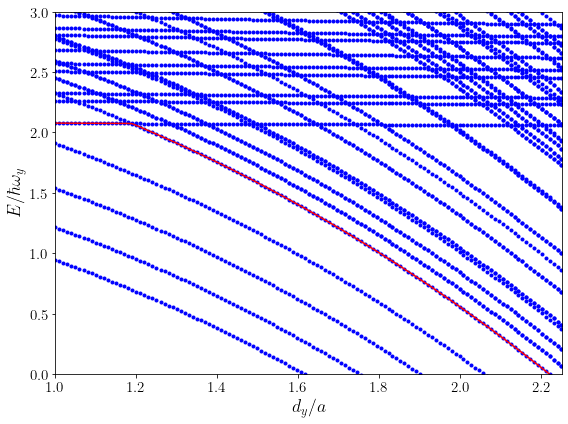

In [10]:
fig, ax = plt.subplots(figsize=(8,6))
for i in range(least_bound_pos, least_bound_pos + 100):
    ax.plot(x, dic['nivel_{}'.format(i)]/wy, 'b.')
ax.plot(x, dic['nivel_1056']/wy, 'r')
#ax.plot(x, dic['nivel_1000']/wy, 'r')
ax.set_ylim(0, 3)
ax.set_xlim(1, 2.25)
ax.set_xlabel('$d_{y}/a$')
ax.set_ylabel('$E/\hbar \omega_{y}$')
plt.tight_layout()
#fig.savefig('Results/Figures/Ix4993_Iy4993_Iz50_400_Easc.png', dpi=200)
plt.show()

# $$(4,0,0), (0,4,0), (2,2,0)$$

In [11]:
%matplotlib inline

## Resonance x>1

1069
1070
1071
1072
1073
1074
1075
1076
1077
1078


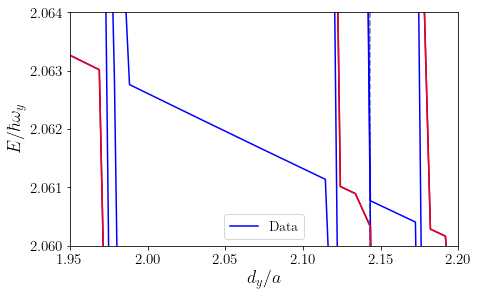

In [12]:
fig2, ax2 = plt.subplots(figsize=aursize)
xpol = np.linspace(x[0], x[-1], num=50)
for i in range(least_bound_pos+17, least_bound_pos + 27):
    print(i)
    ax2.plot(x, dic['nivel_{}'.format(i)]/wy, 'b')
ax2.plot(x, dic['nivel_1069']/wy, 'r')
ax2.plot(x, dic['nivel_1074']/wy, 'r')
ax2.plot(x, dic['nivel_1078']/wy, 'r')
ax2.vlines(x[30], 2.059, 2.076, alpha=0.5, linestyles='--')
ax2.vlines(x[20], 2.059, 2.076, alpha=0.5, linestyles='--')
ax2.vlines(x[9], 2.059, 2.076, alpha=0.5, linestyles='--')
ax2.vlines(x[2], 2.059, 2.076, alpha=0.5, linestyles='--')
ax2.set_ylim(2.060, 2.064)
ax2.set_xlim(1.95, 2.20)
ax2.set_xlabel('$d_{y}/a$')
ax2.set_ylabel('$E/\hbar \omega_{y}$')
ax2.legend(['Data'], fontsize=14)
#plt.savefig('Results/Figures/Ix4993_Iy4993_Iz4993_Easc_Zoom.png', dpi=200)
plt.show()

In [13]:
print('''f Eigenstates:
1064: (0,2,4)
1066: (0,2,6)
1067: (0,0,16)
1068: (0,2,8)
1069: trap
1070: (2,0,10)
1071: (0,2,10)
1072: (0,0,18)
1073: (4,0,0)
1074: (0,4,0)
1078: (2,2,0)
''')

f Eigenstates:
1064: (0,2,4)
1066: (0,2,6)
1067: (0,0,16)
1068: (0,2,8)
1069: trap
1070: (2,0,10)
1071: (0,2,10)
1072: (0,0,18)
1073: (4,0,0)
1074: (0,4,0)
1078: (2,2,0)



In [14]:
print(f'''To find the eigenstates:
x={x[30]}, delta=0{delta[30]}
x={x[20]}, delta=0{delta[20]}
x={x[9]}, delta=0{delta[9]}
x={x[2]}, delta=0{delta[2]}''')

To find the eigenstates:
x=2.143369048753962, delta=0.70450
x=2.239885714434933, delta=0.70400
x=2.3456721432784238, delta=0.70345
x=2.4127838518637623, delta=0.70310


In [15]:
%matplotlib inline

6.597253473797105e-15


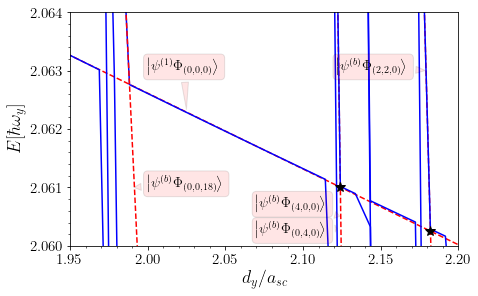

In [16]:
fig3, ax3 = plt.subplots(figsize=aursize)
# nivel 1069:
f1069 = trap_fit(dic, x, x_lims=(1.95, 2.20), y_lims=(2.060, 2.064) ,levels=(1069, 1073), wy=wy, tol=10)/wy
ax3.plot(x, np.polyval(f1069, x), 'r--', markersize=4, label='Diabatic')
ax3.plot(x, dic['nivel_1069']/wy, 'b', label='Adiabatic')

# nivel 1070:
ax3.plot(x, dic['nivel_1070']/wy, 'b')

# nivel 1071:
ax3.plot(x, dic['nivel_1071']/wy, 'b')

# nivel 1072:
ax3.plot(x, dic['nivel_1072']/wy, 'b')
f1072 = np.polyfit(x[(x < 1.995) & (x > 1.975)], np.array(dic['nivel_1072'])[(x < 1.995) & (x > 1.975)]/wy, deg=1)
x1072 = np.linspace(1.95, 2.14, num=200)
ax3.plot(x1072, np.polyval(f1072, x1072), 'r--', markersize=4)

# nivel 1073:
ax3.plot(x, dic['nivel_1073']/wy, 'b')

# nivel 1074:
f1074 = np.polyfit(x[(x < 2.125) & (x > 2.114)], np.array(dic['nivel_1074'])[(x < 2.125) & (x > 2.114)]/wy, deg=1)
x1074 = np.linspace(1.95, 2.14, num=200)
ax3.plot(x1074, np.polyval(f1074, x1074), 'r--', markersize=4)
ax3.plot(x, dic['nivel_1074']/wy, 'b')

# nivel 1075:
ax3.plot(x, dic['nivel_1075']/wy, 'b')

# nivel 1076:
ax3.plot(x, dic['nivel_1076']/wy, 'b')

# nivel 1077:
ax3.plot(x, dic['nivel_1077']/wy, 'b')

# nivel 1078:
f1078 = np.polyfit(x[(x < 2.19) & (x > 2.17)], np.array(dic['nivel_1078'])[(x < 2.19) & (x > 2.17)]/wy, deg=1)
x1078 = np.linspace(1.95, 2.20, num=200)
ax3.plot(x1078, np.polyval(f1078, x1078), 'r--', markersize=4)
ax3.plot(x, dic['nivel_1078']/wy, 'b')

# Crosses:
##########
ax3.plot(cross_points(f1069, f1074), np.polyval(f1069, cross_points(f1069, f1074)), 'k*', markersize=10)
ax3.plot(cross_points(f1069, f1078), np.polyval(f1069, cross_points(f1069, f1078)), 'k*', markersize=10, label='ICIR')

# States:
#########
ax3.annotate(r'$\left|\psi^{(1)} \Phi_{(0,0,0)}\right>$', xy=(2.025, 2.0623), xytext=(2, 2.063), fontsize=14, 
             bbox=dict(boxstyle="round", alpha=0.1, facecolor='r'),
             arrowprops=dict(arrowstyle="wedge, tail_width=0.5", alpha=0.1, facecolor='r'))

ax3.annotate(r'$\left|\psi^{(b)} \Phi_{(0,0,18)}\right>$', xy=(1.99, 2.061), xytext=(2, 2.061), fontsize=14, 
             bbox=dict(boxstyle="round", alpha=0.1, facecolor='r'),
             arrowprops=dict(arrowstyle="wedge, tail_width=0.5", alpha=0.1, facecolor='r'))

ax3.annotate(r'$\left|\psi^{(b)} \Phi_{(4,0,0)}\right>$', xy=(2.125, 2.0605), xytext=(2.07, 2.06065), fontsize=14, 
             bbox=dict(boxstyle="round", alpha=0.1, facecolor='r'),
             arrowprops=dict(arrowstyle="wedge, tail_width=0.5", alpha=0.1, facecolor='r'))

ax3.annotate(r'$\left|\psi^{(b)} \Phi_{(0,4,0)}\right>$', xy=(2.123, 2.0603), xytext=(2.07, 2.0602), fontsize=14, 
             bbox=dict(boxstyle="round", alpha=0.1, facecolor='r'),
             arrowprops=dict(arrowstyle="wedge, tail_width=0.5", alpha=0.1, facecolor='r'))

#ax3.annotate(r'$\left|\psi^{(b)} \Phi_{(0,4,0)}\right>$', xy=(1.75, 3.38), xytext=(1.75, 3.39), fontsize=14, 
#             bbox=dict(boxstyle="round", alpha=0.1, facecolor='r'),
#             arrowprops=dict(arrowstyle="wedge, tail_width=0.5", alpha=0.1, facecolor='r'))
#
#ax3.annotate(r'$\left|\psi^{(b)} \Phi_{(2,0,2)}\right>$', xy=(1.843, 3.38), xytext=(1.80, 3.39), fontsize=14, 
#             bbox=dict(boxstyle="round", alpha=0.1, facecolor='r'),
#             arrowprops=dict(arrowstyle="wedge, tail_width=0.5", alpha=0.1, facecolor='r'))
#
#ax3.annotate(r'$\left|\psi^{(b)} \Phi_{(0,2,2)}\right>$', xy=(1.843, 3.38), xytext=(1.85, 3.39), fontsize=14, 
#             bbox=dict(boxstyle="round", alpha=0.1, facecolor='r'),
#             arrowprops=dict(arrowstyle="wedge, tail_width=0.5", alpha=0.1, facecolor='r'))
#
ax3.annotate(r'$\left|\psi^{(b)} \Phi_{(2,2,0)}\right>$', xy=(2.18, 2.063), xytext=(2.122, 2.063), fontsize=14, 
             bbox=dict(boxstyle="round", alpha=0.1, facecolor='r'),
             arrowprops=dict(arrowstyle="wedge, tail_width=0.5", alpha=0.1, facecolor='r'))


ax3.set_xlabel('$d_{y}/a_{sc}$')
ax3.set_ylabel('$E[\hbar \omega_{y}]$')
#ax3.legend(fontsize=14, bbox_to_anchor=(1.03, 1))
ax3.xaxis.set_minor_locator(AutoMinorLocator())
ax3.yaxis.set_minor_locator(AutoMinorLocator())
ax3.set_ylim(2.060, 2.064)
ax3.set_xlim(1.95, 2.20)
#plt.tight_layout()
fig3.savefig('Results/Figures/Ix4993_Iy4993_Iz4993_Easc_Interpolation_400_v2.png', bbox_inches="tight", dpi=200)

In [17]:
print(f'''Crosses between (x, E):
* 1069-1074 (0,4,0) (4,0,0): ({cross_points(f1069, f1074)}, {np.polyval(f1069, cross_points(f1069, f1074))})
* 1069-1078 (2,2,0): ({cross_points(f1069, f1078)}, {np.polyval(f1069, cross_points(f1069, f1078))})
''')

Crosses between (x, E):
* 1069-1074 (0,4,0) (4,0,0): (2.124032183424504, 2.061005507011396)
* 1069-1078 (2,2,0): (2.182051142942499, 2.0602535080390894)



In [18]:
print(f'''ICIR: asc/dy:
* 1069-1074 (0,4,0) (4,0,0): {1/cross_points(f1069, f1074)}
* 1069-1078 (2,2,0): {1/cross_points(f1069, f1078)}
''')

ICIR: asc/dy:
* 1069-1074 (0,4,0) (4,0,0): 0.4708026591140132
* 1069-1078 (2,2,0): 0.45828440054411307



In [19]:
#np.savetxt('Results/ICIR_positions_4993_4993_50.txt', 
#           [[1], [1/cross_points(f1004, f1007)], [np.polyval(f1004, cross_points(f1004, f1007))]], 
#           header='wx/wy, asc/dy, E/hwy', )

# $$(2,0,0) (0,2,0)$$

7.836847634811429e-15


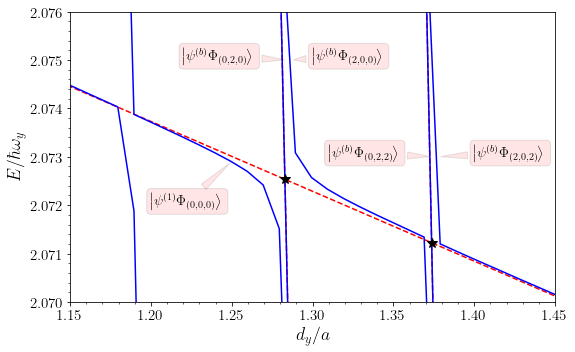

In [23]:
fig3, ax3 = plt.subplots(figsize=(5*aur,5))
# nivel 1056:
f1056 = trap_fit(dic, x, x_lims=(1.15, 1.45), y_lims=(2.07, 2.076) ,levels=(1056, 1061), wy=wy, tol=10)/wy
ax3.plot(x, np.polyval(f1056, x), 'r--', markersize=4, label='Diabetic')
ax3.plot(x, dic['nivel_1056']/wy, 'b', label='Adiabatic')

# nivel 1057:
f1057 = np.polyfit(x[(x < 1.19) & (x > 1.05)], np.array(dic['nivel_1057'])[(x < 1.19) & (x > 1.05)]/wy, deg=1)
x1057 = np.linspace(1, 1.3, num=500)
#ax3.plot(x1057, np.polyval(f1057, x1057), 'r--', markersize=4)
ax3.plot(x, dic['nivel_1057']/wy, 'b')

# nivel 1058:
f1058 = np.polyfit(x[(x > 1.2) & (x < 1.3)], np.array(dic['nivel_1058'])[(x > 1.2) & (x < 1.3)]/wy, deg=1)
x1058 = np.linspace(1.2, 1.3, num=500)
ax3.plot(x1058, np.polyval(f1058, x1058), 'r--', markersize=4)
ax3.plot(x, dic['nivel_1058']/wy, 'b')

# nivel 1059:
# proviene del mismo que el 1058
ax3.plot(x, dic['nivel_1059']/wy, 'b')

# nivel 1060:
f1060 = np.polyfit(x[(x > 1.35) & (x < 1.37)], np.array(dic['nivel_1060'])[(x > 1.35) & (x < 1.37)]/wy, deg=1)
x1060 = np.linspace(1.3, 1.4, num=500)
ax3.plot(x1060, np.polyval(f1060, x1060), 'r--', markersize=4)
ax3.plot(x, dic['nivel_1060']/wy, 'b')

# nivel 1061:
# proviene del mismo que el 1060:
ax3.plot(x, dic['nivel_1061']/wy, 'b')

# Crosses:
##########
#ax3.plot(cross_points(f1056, f1057), np.polyval(f1056, cross_points(f1056, f1057)), 'k*', markersize=10, label='ICIR')
ax3.plot(cross_points(f1056, f1058), np.polyval(f1056, cross_points(f1056, f1058)), 'k*', markersize=10)
ax3.plot(cross_points(f1056, f1060), np.polyval(f1056, cross_points(f1056, f1060)), 'k*', markersize=10)

# States:
#########
#ax3.annotate(r'$\left|\psi^{(b)} \Phi_{(0,0,14)}\right>$', xy=(1.20, 2.075), xytext=(1.15, 2.0765), fontsize=14, 
#             bbox=dict(boxstyle="round", alpha=0.1, facecolor='r'),
#             arrowprops=dict(arrowstyle="wedge, tail_width=0.5", alpha=0.1, facecolor='r'))

ax3.annotate(r'$\left|\psi^{(1)} \Phi_{(0,0,0)}\right>$', xy=(1.25, 2.0729), xytext=(1.2, 2.072), fontsize=14, 
             bbox=dict(boxstyle="round", alpha=0.1, facecolor='r'),
             arrowprops=dict(arrowstyle="wedge, tail_width=0.5", alpha=0.1, facecolor='r'))

ax3.annotate(r'$\left|\psi^{(b)} \Phi_{(0,2,0)}\right>$', xy=(1.284, 2.075), xytext=(1.22, 2.075), fontsize=14, 
             bbox=dict(boxstyle="round", alpha=0.1, facecolor='r'),
             arrowprops=dict(arrowstyle="wedge, tail_width=0.5", alpha=0.1, facecolor='r'))

ax3.annotate(r'$\left|\psi^{(b)} \Phi_{(2,0,0)}\right>$', xy=(1.287, 2.075), xytext=(1.3, 2.075), fontsize=14, 
             bbox=dict(boxstyle="round", alpha=0.1, facecolor='r'),
             arrowprops=dict(arrowstyle="wedge, tail_width=0.5", alpha=0.1, facecolor='r'))

ax3.annotate(r'$\left|\psi^{(b)} \Phi_{(0,2,2)}\right>$', xy=(1.374, 2.073), xytext=(1.31, 2.073), fontsize=14, 
             bbox=dict(boxstyle="round", alpha=0.1, facecolor='r'),
             arrowprops=dict(arrowstyle="wedge, tail_width=0.5", alpha=0.1, facecolor='r'))

ax3.annotate(r'$\left|\psi^{(b)} \Phi_{(2,0,2)}\right>$', xy=(1.378, 2.073), xytext=(1.4, 2.073), fontsize=14, 
             bbox=dict(boxstyle="round", alpha=0.1, facecolor='r'),
             arrowprops=dict(arrowstyle="wedge, tail_width=0.5", alpha=0.1, facecolor='r'))

ax3.set_xlabel('$d_{y}/a$')
ax3.set_ylabel('$E/\hbar \omega_{y}$')
ax3.xaxis.set_minor_locator(AutoMinorLocator())
ax3.yaxis.set_minor_locator(AutoMinorLocator())
ax3.set_ylim(2.07, 2.076)
ax3.set_xlim(1.15, 1.45)
plt.tight_layout()
fig3.savefig('Results/Figures/Ix4993_Iy4993_Iz50_Easc_Interpolation.png', dpi=200)

In [21]:
print(f'''Crosses between (x, E):
* 1056-1058 (2,0,0) (0,2,0): ({cross_points(f1056, f1058)}, {np.polyval(f1056, cross_points(f1056, f1058))})
* 1056-1060 (2,2,0) (0,2,0): ({cross_points(f1056, f1060)}, {np.polyval(f1056, cross_points(f1056, f1060))})''')

Crosses between (x, E):
* 1056-1058 (2,0,0) (0,2,0): (1.2828659876178272, 2.072533461542753)
* 1056-1060 (2,2,0) (0,2,0): (1.373631821179698, 2.071223461046539)


In [24]:
print(f'''ICIR: asc/dy:
* 1056-1058 (2,0,0) (0,2,0): {1/cross_points(f1056, f1058)}
* 1056-1060 (2,2,0) (0,2,0): {1/cross_points(f1056, f1060)}
''')

ICIR: asc/dy:
* 1056-1058 (2,0,0) (0,2,0): 0.7795046479148728
* 1056-1060 (2,2,0) (0,2,0): 0.7279971128953486

